<a href="https://colab.research.google.com/github/vilkaste/compling_course33/blob/main/%D0%9A%D1%83%D0%B7%D0%BD%D0%B5%D1%86%D0%BE%D0%B2%D0%B0_vectors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Bag-of-Words

### Домашка

In [2]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 66.0 MB/s eta 0:00:00


In [3]:
import gensim
import gensim.downloader as api
from gensim import corpora
from gensim.models import TfidfModel
import numpy as np
from pprint import pprint

1. Скачать [датасет по ссылке](https://raw.githubusercontent.com/tyqiangz/multilingual-sentiment-datasets/refs/heads/main/data/english/test.csv) (просто запустить строку ниже)

In [4]:
!wget https://raw.githubusercontent.com/tyqiangz/multilingual-sentiment-datasets/refs/heads/main/data/english/test.csv

--2025-11-07 20:46:41--  https://raw.githubusercontent.com/tyqiangz/multilingual-sentiment-datasets/refs/heads/main/data/english/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 102826 (100K) [text/plain]
Saving to: ‘test.csv’

test.csv            100%[===================>] 100.42K  --.-KB/s    in 0.009s  

2025-11-07 20:46:41 (10.8 MB/s) - ‘test.csv’ saved [102826/102826]



2. Открыть csv и сохранить текст в переменную (макс. балл == 1)

In [5]:
import pandas as pd
df = pd.read_csv(r'/content/test.csv')
df

,text,label,source
0,Trying to have a conversation with my dad abou...,negative,sem_eval_2017
1,#latestnews 4 #newmexico #politics + #nativeam...,neutral,sem_eval_2017
2,@user You are a stand up guy and a Gentleman V...,positive,sem_eval_2017
3,@user @user @user Looks like Flynn isn't too p...,negative,sem_eval_2017
4,perfect pussy clips #vanessa hudgens zac efron...,neutral,sem_eval_2017
...,...,...,...
865,"""All 11 of the UK’s most senior judges will ta...",neutral,sem_eval_2017
866,@user #hatchimals #BlackFriday Count me in! 🍀,positive,sem_eval_2017
867,American Radical Christianity seems to love ha...,negative,sem_eval_2017
868,#ICYMI The #NBAwards winners for 2016 wereThe ...,neutral,sem_eval_2017


3. Извлечь столбец с текстами (макс. балл == 1)

In [6]:
text = df['text']
text

,text
0,Trying to have a conversation with my dad abou...
1,#latestnews 4 #newmexico #politics + #nativeam...
2,@user You are a stand up guy and a Gentleman V...
3,@user @user @user Looks like Flynn isn't too p...
4,perfect pussy clips #vanessa hudgens zac efron...
...,...
865,"""All 11 of the UK’s most senior judges will ta..."
866,@user #hatchimals #BlackFriday Count me in! 🍀
867,American Radical Christianity seems to love ha...
868,#ICYMI The #NBAwards winners for 2016 wereThe ...


4. Построить Bag-of-Words (макс. балл == 3)

20 самых частых слов в корпусе:
user: 570
the: 387
to: 268
a: 227
of: 199
is: 186
for: 176
in: 165
and: 164
i: 135
on: 118
you: 92
this: 80
it: 79
that: 79
with: 71
are: 65
trump: 62
be: 60
not: 59


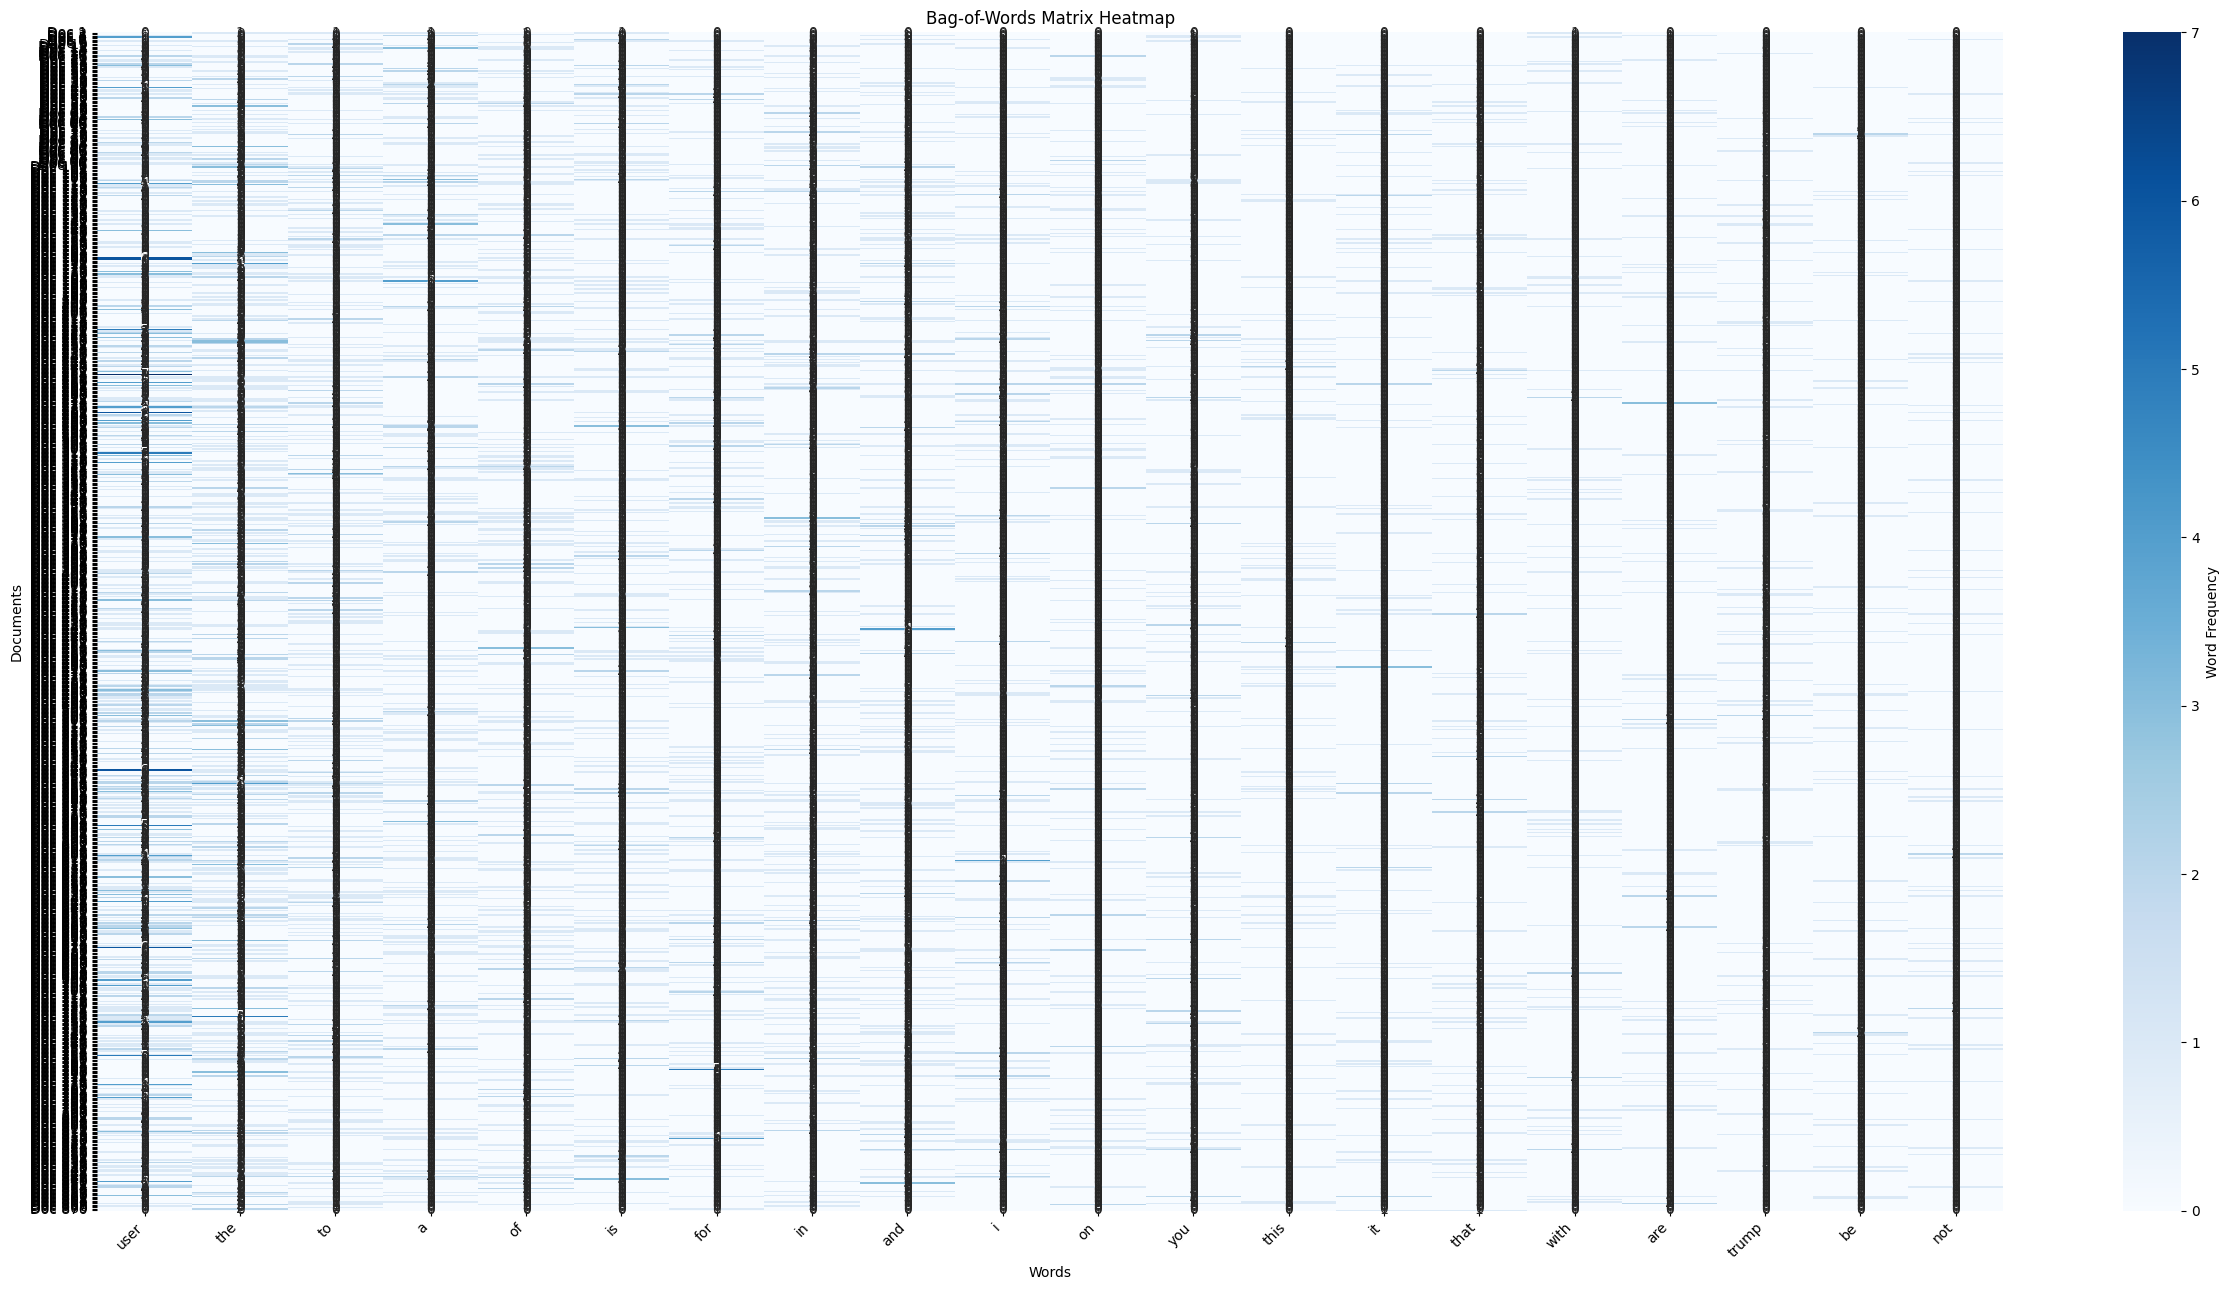

In [11]:
# Задача 1.1: Создайте словарь и BoW представление (макс. балл == 2)

import re # импортируем
tokenized_docs = [d.lower().split() for d in text] # приводим в нижний регистр
cleaned_docs = [] # создаем пустой список
for doc in tokenized_docs:
  cleaned_doc = [re.sub(r'[^\w\s]', '', word) for word in doc] # убираем знаки
  cleaned_doc = [word for word in cleaned_doc if word] # убираем лишние строки
  cleaned_docs.append(cleaned_doc) # добавляем в список результат

tokenized_docs = cleaned_docs # присваиваем очистку

dictionary = corpora.Dictionary(tokenized_docs) # создааем словарь

bow_corpus = [dictionary.doc2bow(doc) for doc in cleaned_docs] # доктументы в бов векторы

# Задача 1.2: Визуализируйте результаты (макс. балл == 1)
# считаем частотность слов
word_freq = {}
for doc in bow_corpus:
      for idx, freq in doc:
          word = dictionary [idx]
          word_freq[word] = word_freq.get(word, 0) + freq

top_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:20] # отбираем нужное кол-во
top_words_list = [word for word, freq in top_words]

print("20 самых частых слов в корпусе:")
for word, freq in top_words:
    print(f"{word}: {freq}")
# преобразовываем результат в плотный вид
def bow_to_dense(bow_corpus, dictionary):
    dense_vectors = []
    for doc in bow_corpus:
        dense_vec = [0] * len(dictionary)
        for idx, freq in doc:
            dense_vec[idx] = freq
        dense_vectors.append(dense_vec)
    return dense_vectors

matrix = np.array(bow_to_dense(bow_corpus, dictionary))
num_docs = len(bow_corpus)

# получаем индексы топ-20
top_indices = [dictionary.token2id[word] for word in top_words_list if word in dictionary.token2id]

matrix_subset = matrix[:, top_indices] # создаем подматрицу

doc_names = [f"Doc {i+1}" for i in range(num_docs)]

# импорт
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

 #Визуализация
#настраиваем и подписываем
plt.figure(figsize=(25, 13))

sns.heatmap(matrix_subset,
            annot=True,
            fmt='d',
            xticklabels=top_words_list,
            yticklabels=doc_names,
            cmap='Blues',
            cbar_kws={'label': 'Word Frequency'})
plt.title('Bag-of-Words Matrix Heatmap')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Documents')
plt.xlabel('Words')
plt.tight_layout()
plt.show()


5. Построить TF-IDF (макс. балл == 5)

In [12]:
#это задание делалось сильно с ИИ. я мало чего поняла
#импорты
from gensim.models import TfidfModel
import numpy as np
import pandas as pd

# применяем TF-IDF к BoW представлению
tfidf_model = TfidfModel(bow_corpus)
tfidf_corpus = tfidf_model[bow_corpus]

# выводим TF-IDF вектора для документов
for i, doc_vec in enumerate(tfidf_corpus, 1):
    print(f"Документ {i}: {[(dictionary[idx], round(score, 3)) for idx, score in doc_vec]}")

# анализ
def analyze_tfidf_components(bow_corpus, dictionary):
    tf_matrix = np.zeros((len(bow_corpus), len(dictionary)))
    for doc_idx, doc in enumerate(bow_corpus):
        for word_idx, freq in doc:
            tf_matrix[doc_idx, word_idx] = freq

    df_vector = np.sum(tf_matrix > 0, axis=0)
    N = len(bow_corpus)
    idf_vector = np.log(N / (df_vector + 1)) + 1
    tfidf_manual = tf_matrix * idf_vector
# возвращаем резульатат
    return tf_matrix, df_vector, idf_vector, tfidf_manual

tf_matrix, df_vector, idf_vector, tfidf_manual = analyze_tfidf_components(bow_corpus, dictionary)
# берем ненулевые значения
df_results = []
for word_id in range(len(dictionary)):
    word = dictionary[word_id]
    tf_total = np.sum(tf_matrix[:, word_id])
    df = df_vector[word_id]
    idf = idf_vector[word_id]
    tfidf_values = tfidf_manual[:, word_id]
    non_zero_tfidf = tfidf_values[tfidf_values > 0]
    avg_tfidf = np.mean(non_zero_tfidf) if len(non_zero_tfidf) > 0 else 0
#записываем
    df_results.append({
        'word': word,
        'tf_total': tf_total,
        'df': df,
        'idf': round(idf, 4),
        'tf-idf': round(avg_tfidf, 4)
    })
# создаем дата фрейм и записываем в файл
tfidf_df = pd.DataFrame(df_results)
tfidf_df.to_csv('vectors.csv', index=False, encoding='utf-8-sig')

Документ 1: [('a', np.float64(0.078)), ('about', np.float64(0.163)), ('caveman', np.float64(0.35)), ('conversation', np.float64(0.35)), ('dad', np.float64(0.314)), ('ever', np.float64(0.257)), ('have', np.float64(0.149)), ('infuriating', np.float64(0.35)), ('is', np.float64(0.087)), ('most', np.float64(0.21)), ('my', np.float64(0.149)), ('pointless', np.float64(0.35)), ('the', np.float64(0.056)), ('thing', np.float64(0.236)), ('to', np.float64(0.069)), ('trying', np.float64(0.293)), ('vegetarianism', np.float64(0.226)), ('with', np.float64(0.132))]
Документ 2: [('4', np.float64(0.238)), ('altright', np.float64(0.281)), ('at', np.float64(0.162)), ('israel', np.float64(0.234)), ('latestnews', np.float64(0.369)), ('nativeamerican', np.float64(0.369)), ('newmexico', np.float64(0.369)), ('of', np.float64(0.086)), ('palestine', np.float64(0.256)), ('politics', np.float64(0.309)), ('protesting', np.float64(0.331)), ('rise', np.float64(0.309))]
Документ 3: [('a', np.float64(0.195)), ('and', np

##### **Как вычислить компоненты вручную**

```python
def analyze_tfidf_components(bow_corpus, dictionary):
    # Шаг 1: Создаем матрицу TF (term frequency)
    tf_matrix = np.zeros((len(bow_corpus), len(dictionary)))
    for doc_idx, doc in enumerate(bow_corpus):
        for word_idx, freq in doc:
            tf_matrix[doc_idx, word_idx] = freq
    
    # Шаг 2: Вычисляем DF (document frequency)
    df_vector = np.sum(tf_matrix > 0, axis=0)  # Количество документов с каждым словом
    
    # Шаг 3: Вычисляем IDF (inverse document frequency)
    N = len(bow_corpus)  # общее количество документов
    idf_vector = np.log(N / (df_vector + 1)) + 1
    
    # Шаг 4: Вычисляем TF-IDF вручную
    tfidf_manual = tf_matrix * idf_vector
    
    return tf_matrix, df_vector, idf_vector, tfidf_manual
```